In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dictionary.txt to dictionary.txt
Saving ticdata2000.txt to ticdata2000.txt
Saving TicDataDescr.txt to TicDataDescr.txt
Saving ticeval2000.txt to ticeval2000.txt
Saving tictgts2000.txt to tictgts2000.txt


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
import pandas as pd

# Load training data
train_df = pd.read_csv("ticdata2000.txt", header=None, sep="\t")

# Load test data (no labels)
test_df = pd.read_csv("ticeval2000.txt", header=None, sep="\t")

# Load test labels
test_labels = pd.read_csv("tictgts2000.txt", header=None, sep="\t")

# Preview
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("Test labels shape:", test_labels.shape)


Training set shape: (5822, 86)
Test set shape: (4000, 85)
Test labels shape: (4000, 1)


In [ ]:
import pandas as pd

# Load training data
train_df = pd.read_csv("ticdata2000.txt", header=None, sep="\t")

# The last column is the target: CARAVAN
X = train_df.iloc[:, :-1]  # All columns except the last
y = train_df.iloc[:, -1]   # The last column

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target value counts:\n", y.value_counts())



Features shape: (5822, 85)
Target shape: (5822,)
Target value counts:
 85
0    5474
1     348
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load training data
train_df = pd.read_csv("ticdata2000.txt", header=None, sep='\t')

# Separate features and target
X = train_df.iloc[:, :-1]  # features
y = train_df.iloc[:, -1]   # target: CARAVAN

# Check class imbalance
print("Target distribution:\n", y.value_counts())

# Split data into train/validation for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 1. Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_val_scaled)

print("\n=== Logistic Regression Report ===")
print(confusion_matrix(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))

# 2. Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print("\n=== Random Forest Report ===")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


Target distribution:
 85
0    5474
1     348
Name: count, dtype: int64

=== Logistic Regression Report ===
[[1090    5]
 [  70    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1095
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.88      0.94      0.91      1165


=== Random Forest Report ===
[[1078   17]
 [  66    4]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1095
           1       0.19      0.06      0.09        70

    accuracy                           0.93      1165
   macro avg       0.57      0.52      0.53      1165
weighted avg       0.90      0.93      0.91      1165



In [ ]:
!pip install imbalanced-learn


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib
from google.colab import files

# Step 1: Load uploaded files
train_df = pd.read_csv("ticdata2000.txt", header=None, sep="\t")
X_test = pd.read_csv("ticeval2000.txt", header=None, sep="\t")
y_test = pd.read_csv("tictgts2000.txt", header=None, sep="\t")

# Step 2: Split features and target from training data
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on test data
y_test_pred = model.predict(X_test_scaled)

# Step 6: Save predictions to CSV
pred_df = pd.DataFrame({
    "Predicted": y_test_pred,
    "Actual": y_test.values.flatten()
})
pred_df.to_csv("test_predictions.csv", index=False)

# Step 7: Save model and scaler
joblib.dump(model, "final_rf_model.pkl")
joblib.dump(scaler, "final_scaler.pkl")

# Step 8: Download all 3 files
files.download("test_predictions.csv")
files.download("final_rf_model.pkl")
files.download("final_scaler.pkl")

# Step 9: Optional - Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3762
           1       0.18      0.07      0.10       238

    accuracy                           0.93      4000
   macro avg       0.56      0.53      0.53      4000
weighted avg       0.90      0.93      0.91      4000



In [ ]:
!pip install lightgbm


In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 348, number of negative: 5474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 5822, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059773 -> initscore=-2.755562
[LightGBM] [Info] Start training from score -2.755562


LGBMClassifier()

Visualization - Graph

In [ ]:
X_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
i = 0
X_row = X_test_df.iloc[[i]]

In [ ]:
import pandas as pd

df = pd.read_csv("ticdata2000.txt", header=None, sep = "\t")
df.columns = [f"Feature_{i}" for i in range(df.shape[1] - 1)] + ["CARAVAN"]
print("Columns assigned successfully:", df.columns[:5], "...", df.columns[-1])

Columns assigned successfully: Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'], dtype='object') ... CARAVAN


BAR PLOT - TARGET CLASS DISTRIBUTION

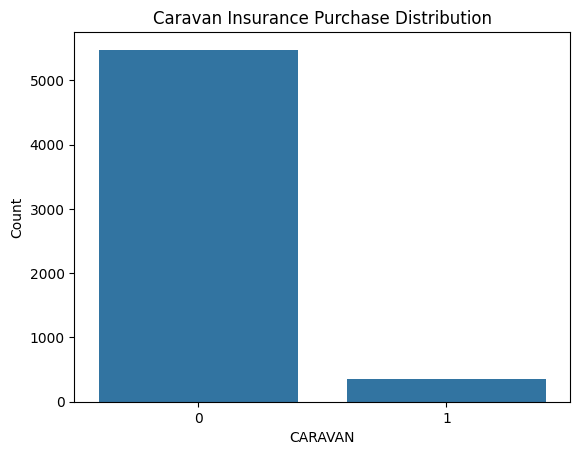

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of the target distribution
sns.countplot(x=y)
plt.title("Caravan Insurance Purchase Distribution")
plt.xlabel("CARAVAN")
plt.ylabel("Count")
plt.show()

BOX PLOT - DISTRIBUTION OF A FEATURE BY CLASS

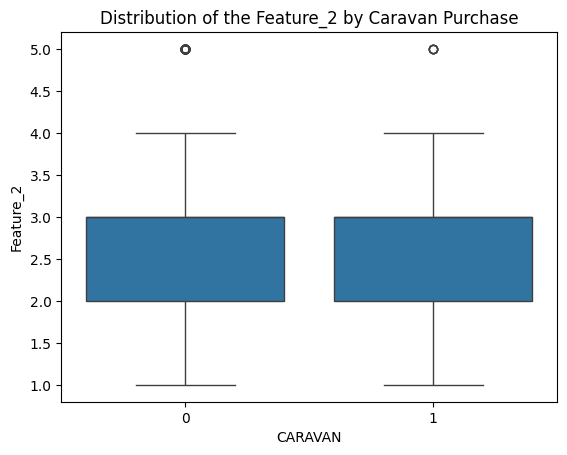

In [ ]:
df = train_df.copy()
df.columns = [f"Feature_{i}" for i in range(df.shape[1] - 1)] + ["CARAVAN"]

sns.boxplot(x= 'CARAVAN', y='Feature_2', data=df)
plt.title("Distribution of the Feature_2 by Caravan Purchase")
plt.show()

COORELATION HEATMAP - BETWEEN FEATURES

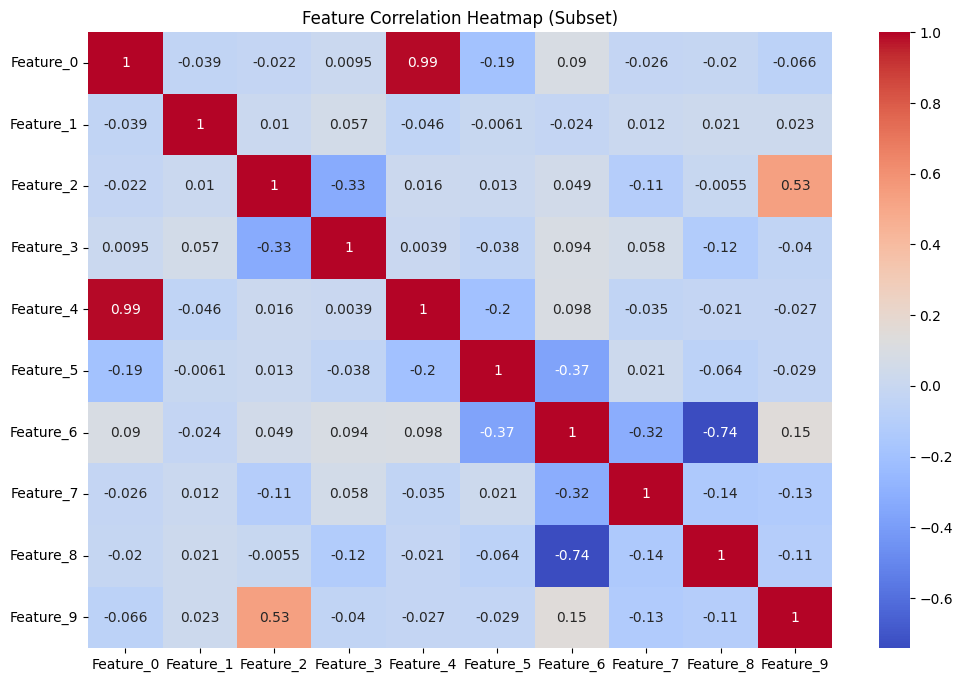

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:, :10].corr(), annot=True, cmap= "coolwarm")
plt.title("Feature Correlation Heatmap (Subset)")
plt.show()

GROUPED BAR PLOT - FEATURE AGGREGATED BY CLASS

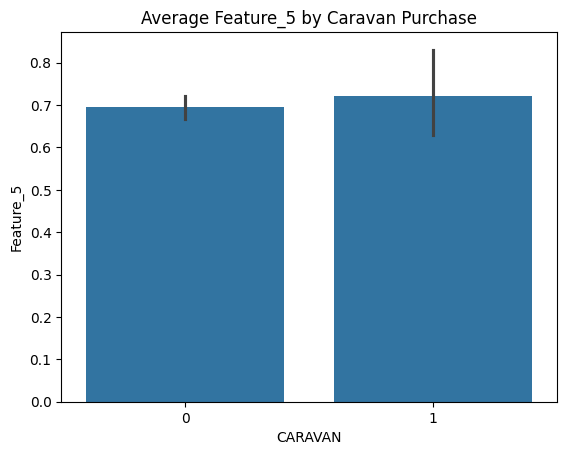

In [ ]:
# Average Feature_5 by CARAVAN
sns.barplot(x= 'CARAVAN' , y= 'Feature_5', data=df)
plt.title("Average Feature_5 by Caravan Purchase")
plt.show()